In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56423_U')

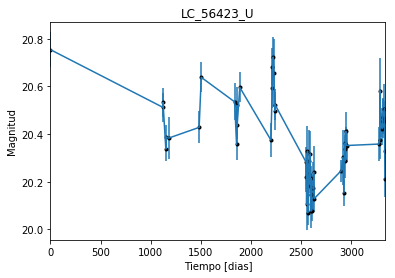

In [2]:
data = np.genfromtxt('LC_56423_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56423_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

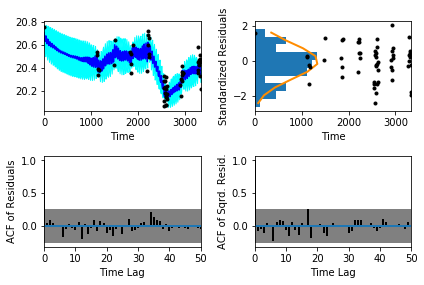

In [5]:
sample.assess_fit()

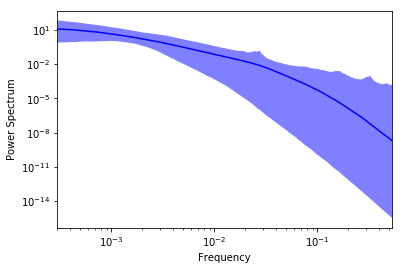

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56423_U')

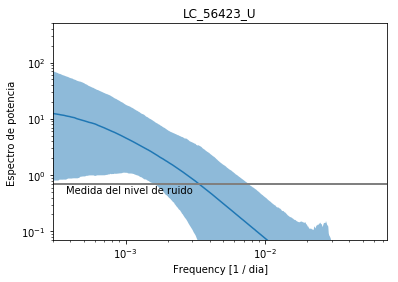

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56423_U')

Text(0.5,1,'Prediccion , valor esperado LC_56423_U')

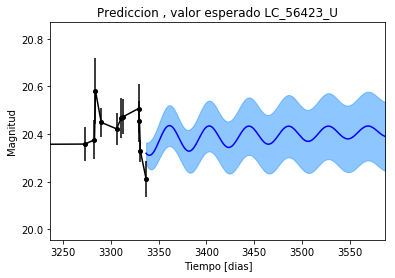

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56423_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56423_U')

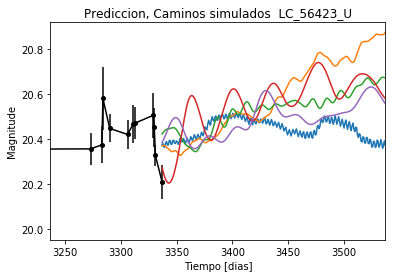

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56423_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56423_U')

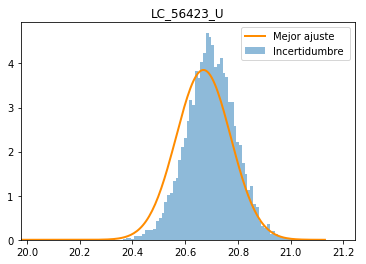

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56423_U')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_U')

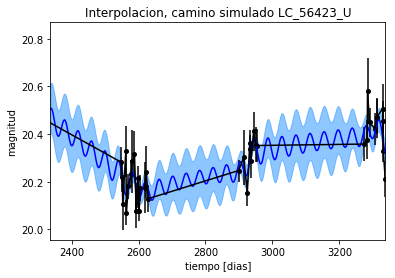

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_U')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_U')

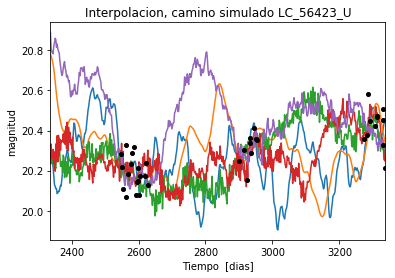

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 444.052893102
Median: 0.0112935801711
Standard deviation: 0.189024600798
68% credibility interval: [ 0.00116457  0.14652973]
95% credibility interval: [  3.85806677e-04   7.68286689e-01]
99% credibility interval: [  3.20852978e-04   1.02008498e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1012.22065548
Median: 0.00455428132509
Standard deviation: 0.0947327634371
68% credibility interval: [ 0.00076071  0.04594739]
95% credibility interval: [ 0.00034849  0.30349382]
99% credibility interval: [  3.09201149e-04   7.37050362e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1065.63323612
Median: 0.0804037577511
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 889.039230966
Median: 71.7372904214
Standard deviation: 1.96204171313
68% credibility interval: [ 69.64778536  73.26284346]
95% credibility interval: [ 67.00623918  74.95821787]
99% credibility interval: [ 65.19861898  76.0067925 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 363.311734038
Median: 1.08747303909
Standard deviation: 2.5293238602
68% credibility interval: [ 0.16147719  4.81358389]
95% credibility interval: [ 0.03222028  8.87409134]
99% credibility interval: [  0.01412761  12.03821109]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 516.755200816
Median: 1.32247176446
Standard deviation: 11.6199249802
68% credibility interval: [  0.04683257  15.0530425 ]
95% credibility interval: [  7.36866624e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20036.25424
Median: 1.66815937578e-23
Standard deviation: 1.25796862985e+27
68% credibility interval: [  2.04195155e-100   2.68320634e-006]
95% credibility interval: [  2.24308786e-139   1.16729693e+007]
99% credibility interval: [  1.99947260e-150   1.52950846e+011]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2221.04896252
Median: 20.4416452445
Standard deviation: 0.0944562036783
68% credibility interval: [ 20.36599916  20.52689362]
95% credibility interval: [ 20.26848258  20.64903753]
99% credibility interval: [ 20.16551272  20.74814944]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 532.728627647
Median: 0.0617345547113
Standard deviation: 0.28303361517
68% credibility interval: [ 0.          0.50392787]
95% credibility interval: [ 0.          0.97317098]
99% credibility interval: [ 0.          1.05289279]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 532.728627647
Median: 0.0617345547113
Standard deviation: 0.28303361517
68% credibility interval: [ 0.          0.50392787]
95% credibility interval: [ 0.          0.97317098]
99% credibility interval: [ 0.          1.05289279]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2039.75027968
Median: 0.0
Standard deviation: 0.000756635381699
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 889.039230966
Median: 71.7372904214
Standard deviation: 1.96204171313
68% credibility interval: [ 69.64778536  73.26284346]
95% credibility interval: [ 67.00623918  74.95821787]
99% credibility interval: [ 65.19861898  76.0067925 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1996.31103373
Median: 0.0364981744369
Standard deviation: 0.0369344101185
68% credibility interval: [ 0.02168895  0.06635182]
95% credibility interval: [ 0.01386271  0.13266714]
99% credibility interval: [ 0.01020828  0.20901576]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1837.96060214
Median: 1.07388276501
Standard deviation: 0.203813827419
68% credibility interval: [ 0.89097662  1.28685493]
95% credibility interval: [ 0.75399908  1.54729653]
99% credibility interval: [ 0.66838217  1.72853502]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 815.715586514
Median: 0.00403229706051
Standard deviation: 0.451485836445
68% credibility interval: [  3.51020324e-05   1.31426018e-01]
95% credibility interval: [  4.68356416e-10   1.29862291e+00]
99% credibility interval: [  1.63558805e-14   3.10750917e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 444.052893102
Median: (-0.0709596569967-0.337314503087j)
Standard deviation: 2.13848400714
68% credibility interval: [-0.92067347-5.11466081j -0.00731721-2.46743235j]
95% credibility interval: [ -4.82728763e+00+0.j          -2.42409485e-03-2.32834261j]
99% credibility interval: [ -6.40938298e+00+0.j          -2.01597871e-03-0.02334843j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1012.22065548
Median: (-0.0286153935066+5.25410392461j)
Standard deviation: 1.87532108705
68% credibility interval: [-0.28869599+6.11461359j -0.00477968+0.j        ]
95% credibility interval: [-1.90690790+4.14389549j -0.00218964+0.0884844j ]
99% credibility interval: [ -4.63102401e+00+3.17890827j  -1.94276812e-03+2.30709981j]
Posterior sum